In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## LOAD DATA SET

In [62]:
direct = r'C:\Users\loges\Documents\sign_language_detection\train' 
direct1 = r'C:\Users\loges\Documents\sign_language_detection\New folder\train'
#direct = r'C:\Users\loges\Documents\sign_language_detection\New folder\New foldere3'
batch_size = 192
#batch_size = 64
#batch_size = 160
target_size = (128,128)  


train_datagen= ImageDataGenerator(
   shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8,1.3],
   horizontal_flip = True,
    rescale=1.0 / 255,
    fill_mode = "constant"
   )

'''
shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8,1.3],
'''

train_generator1 = train_datagen.flow_from_directory(
    direct,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical', 
    color_mode='grayscale',
    shuffle=True            
)

train_generator2 = train_datagen.flow_from_directory(
    direct1,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical', 
    color_mode='grayscale',
    shuffle=True            
)

#color_mode='grayscale',


Found 98680 images belonging to 27 classes.
Found 54893 images belonging to 27 classes.


In [63]:
direct_test =  r'C:\Users\loges\Documents\sign_language_detection\test' 
#direct_test = r'C:\Users\loges\Documents\sign_language_detection\New folder\test'
#batch_size = 160
batch_size = 192
#batch_size = 64
target_size = (128, 128)  
  


test_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)


test_generator = test_datagen.flow_from_directory(
    direct_test,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  
    color_mode = "grayscale",
    shuffle=True            
)

class_len = len(test_generator.class_indices)

print(class_len)



Found 5326 images belonging to 27 classes.
27


(192, 128, 128, 1)
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space']


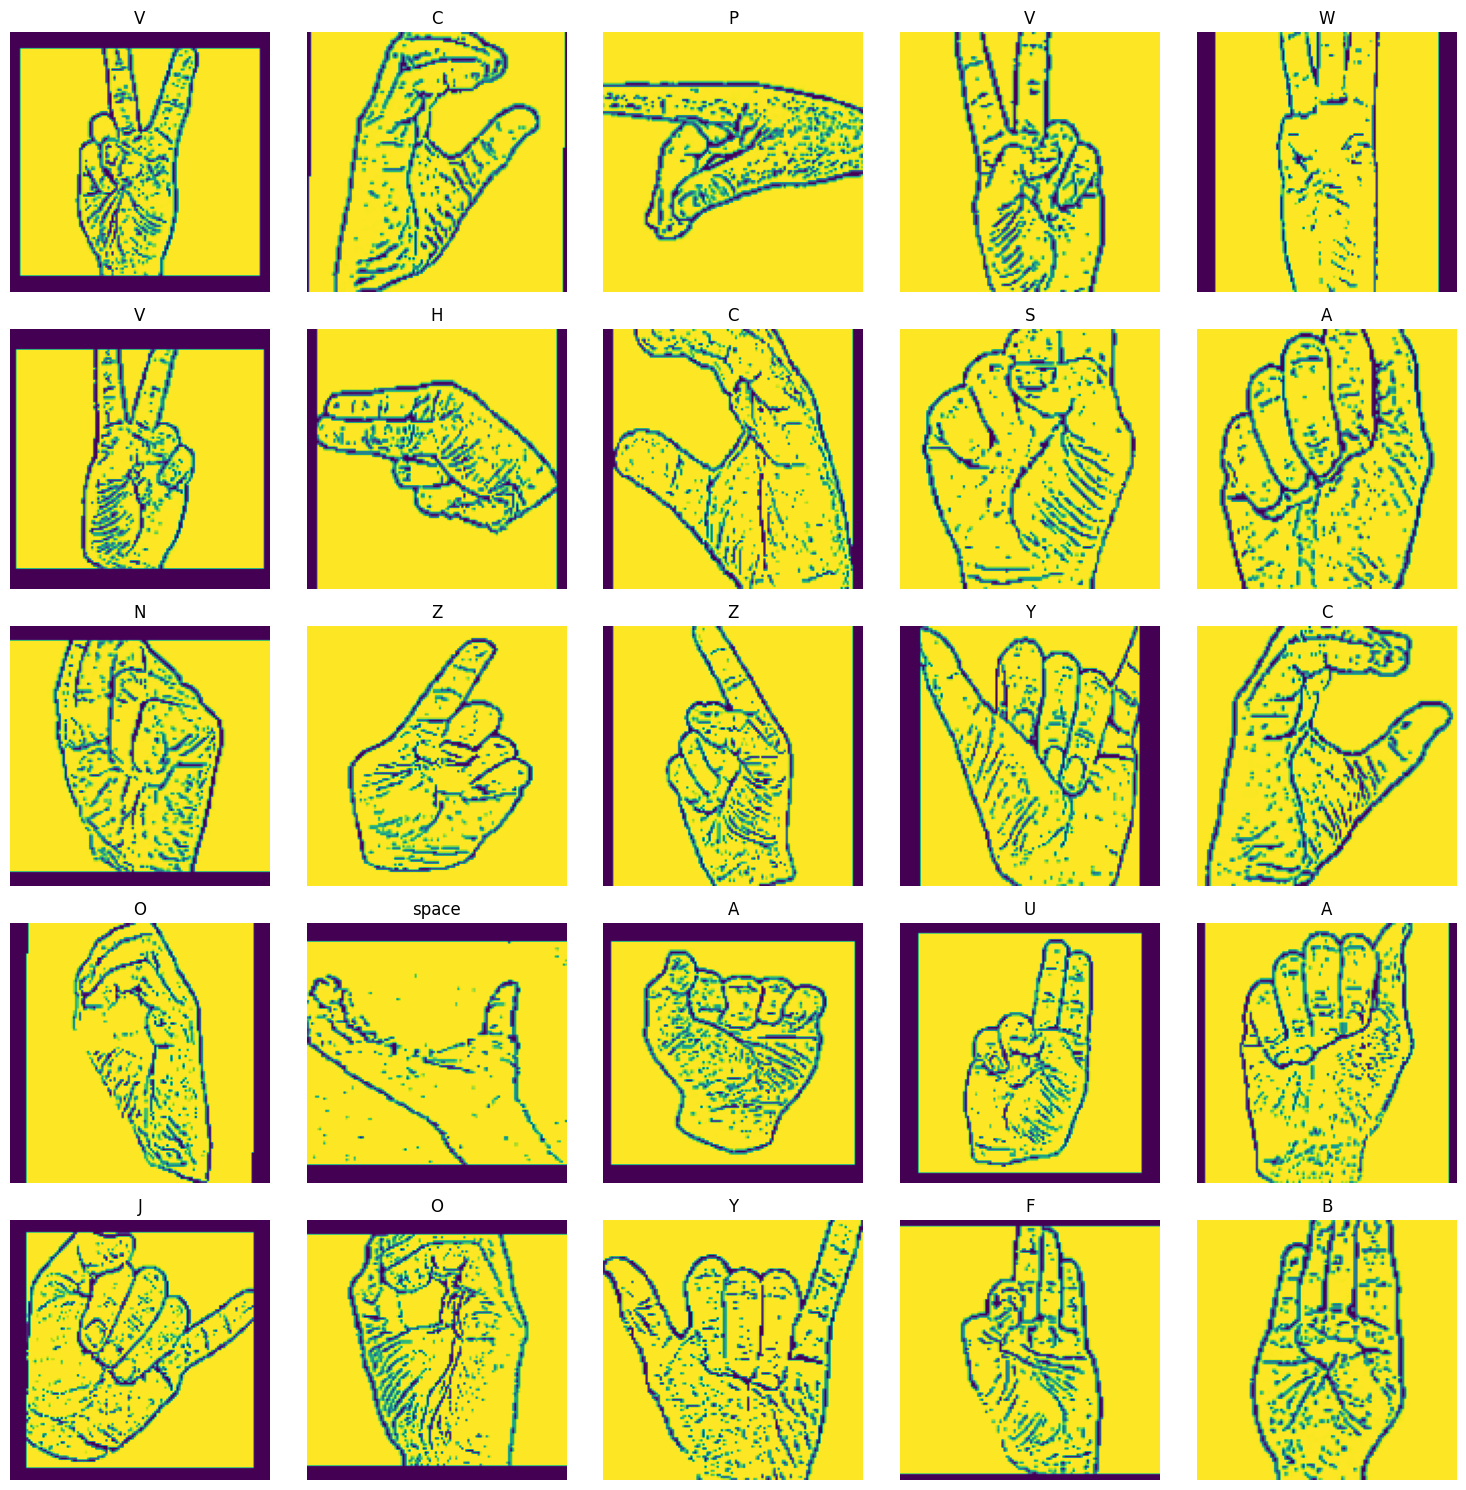

In [4]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)
print(images.shape)

class_labels = list(train_generator.class_indices.keys())

print(class_labels)
def plot_images(images, labels, class_labels, nrows=5, ncols=5):
    plt.figure(figsize=(15, 15))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i])
        true_label = class_labels[labels[i].argmax()] 
        plt.title( true_label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


plot_images(images, labels, class_labels)


##  TRAINING MODEL


In [38]:
model1=Sequential()
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,1)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model1.add(MaxPool2D((2,2)))
          
model1.add(Flatten())

model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(27,activation = "softmax"))
model1.summary()


model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),loss='categorical_crossentropy',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [59]:
for i in range(3):
    if i==1:
        model1.fit(train_generator2,epochs=2 ,validation_data = test_generator)
    else :
         model1.fit(train_generator1,epochs=2 ,validation_data = test_generator)

        

Epoch 1/2
286/286 [==============================] - 91s 318ms/step - loss: 0.0140 - accuracy: 0.9985 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
286/286 [==============================] - 90s 314ms/step - loss: 0.0135 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 1/2
81/81 [==============================] - 29s 360ms/step - loss: 0.0187 - accuracy: 0.9977 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
81/81 [==============================] - 23s 287ms/step - loss: 0.0234 - accuracy: 0.9969 - val_loss: 2.2076e-09 - val_accuracy: 1.0000
Epoch 1/2
286/286 [==============================] - 93s 323ms/step - loss: 0.0123 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
286/286 [==============================] - 90s 315ms/step - loss: 0.0131 - accuracy: 0.9983 - val_loss: 3.7514e-06 - val_accuracy: 1.0000


In [60]:
model1.save("mdl94.h5")

## RELOAD MODEL FOR TRAINING

In [65]:
from tensorflow.keras.models import load_model

model1 = load_model("mdl84.h5")

## MODEL EVALUATION

In [66]:
evaluation_result = model1.evaluate(
    test_generator,
    steps=len(test_generator),  
    verbose=1  )
print("Test loss:", evaluation_result[0])
print("Test accuracy:", evaluation_result[1])

28/28 [==============================] - 3s 96ms/step - loss: 0.5480 - accuracy: 0.9679
Test loss: 0.5479643940925598
Test accuracy: 0.9678933620452881


## MODEL CONFIGURATIOIN

In [6]:
for l in model1.layers:
    print(f"{l.name}\n {l.get_config()}")
    print()

conv2d
 {'name': 'conv2d', 'trainable': True, 'batch_input_shape': (None, 128, 128, 1), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}

max_pooling2d
 {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}

conv2d_1
 {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True

In [5]:
model1.get_layer('dropout').rate = 0.3

In [27]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),loss='categorical_crossentropy',metrics=['accuracy'])
